# Lab 7

## part 1

### util.py

In [38]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import numpy as np
import random

def create_train_dataset():
    n_train = 100000
    max_train_card = 10

    ############## Task 1
    X_train = []
    y_train = []
    ##################
    for i in range(n_train):
        card = random.randint(1,max_train_card)
        s = np.random.randint(1,max_train_card, card)
        padding = np.zeros(max_train_card - s.shape[0])
        s = np.concatenate((s, padding)).astype(int)
        X_train.append(s)
        y_train.append(s.sum())
    ##################

    return X_train, y_train


def create_test_dataset():
    
    ############## Task 2
    
    ##################
    n_test = 10000
    max_test_digit = 10
    X_test = []
    y_test = []
    for j in range(5,105,5):
            s = np.random.randint(1,max_test_digit, size=(n_test,j)).astype(int)
            X_test.append(s)
            y_test.append(s.sum(axis=1))
    ##################

    return X_test, y_test

### model.py

In [4]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import torch
import torch.nn as nn

In [18]:
class DeepSets(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(DeepSets, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        
        ############## Task 3
    
        ##################
        x = self.embedding(x)
        x = self.tanh(self.fc1(x))
        x = x.sum(axis=1)
        x = self.fc2(x)
        ##################
        
        return x.squeeze()


class LSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(LSTM, self).__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        
        ############## Task 4
    
        ##################
        x = self.embedding(x)
        output, _ = self.lstm(x)
        x = output[:,-1:,:]
        x = self.fc(x)
        ##################
        
        return x.squeeze()

### train.py

In [8]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import time
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

# from utils import create_train_dataset
# from models import DeepSets, LSTM


# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 20
batch_size = 64
embedding_dim = 128
hidden_dim = 64
learning_rate = 0.001

# Generates training data
X_train, y_train = create_train_dataset()
n_train = 100000
n_digits = 11

# Initializes DeepSets model and optimizer
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(deepsets.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the DeepSets model
for epoch in range(epochs):
    t = time.time()
    deepsets.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in tqdm(range(0, n_train, batch_size)):
        ############## Task 5
    
        ##################
        x_batch = torch.LongTensor([X_train[j] for j in idx[i:i+batch_size]]).to(device)
        y_batch = torch.LongTensor([y_train[j] for j in idx[i:i+batch_size]]).to(device)
        ##################
        
        optimizer.zero_grad()
        output = deepsets(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))
    time.sleep(0.5)
# Stores DeepSets model into disk
torch.save({
    'state_dict': deepsets.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_deepsets.pth.tar')

print("Finished training for DeepSets model")
print()

100%|██████████| 1563/1563 [00:10<00:00, 150.15it/s]


Epoch: 0001 loss_train: 0.8291 time: 10.4142s


100%|██████████| 1563/1563 [00:11<00:00, 137.19it/s]


Epoch: 0002 loss_train: 0.0700 time: 11.4053s


100%|██████████| 1563/1563 [00:10<00:00, 150.34it/s]


Epoch: 0003 loss_train: 0.0479 time: 10.4006s


100%|██████████| 1563/1563 [00:10<00:00, 147.20it/s]


Epoch: 0004 loss_train: 0.0435 time: 10.6253s


100%|██████████| 1563/1563 [00:10<00:00, 147.30it/s]


Epoch: 0005 loss_train: 0.0406 time: 10.6234s


100%|██████████| 1563/1563 [00:09<00:00, 166.10it/s]


Epoch: 0006 loss_train: 0.0341 time: 9.4205s


100%|██████████| 1563/1563 [00:09<00:00, 157.29it/s]


Epoch: 0007 loss_train: 0.0323 time: 9.9473s


100%|██████████| 1563/1563 [00:09<00:00, 157.14it/s]


Epoch: 0008 loss_train: 0.0333 time: 9.9544s


100%|██████████| 1563/1563 [00:08<00:00, 175.76it/s]


Epoch: 0009 loss_train: 0.0306 time: 8.8973s


100%|██████████| 1563/1563 [00:09<00:00, 162.13it/s]


Epoch: 0010 loss_train: 0.0283 time: 9.6484s


100%|██████████| 1563/1563 [00:10<00:00, 150.46it/s]


Epoch: 0011 loss_train: 0.0282 time: 10.3922s


100%|██████████| 1563/1563 [00:09<00:00, 157.78it/s]


Epoch: 0012 loss_train: 0.0286 time: 9.9130s


100%|██████████| 1563/1563 [00:10<00:00, 151.92it/s]


Epoch: 0013 loss_train: 0.0288 time: 10.2990s


100%|██████████| 1563/1563 [00:11<00:00, 141.92it/s]


Epoch: 0014 loss_train: 0.0265 time: 11.0314s


100%|██████████| 1563/1563 [00:10<00:00, 152.20it/s]


Epoch: 0015 loss_train: 0.0294 time: 10.2783s


100%|██████████| 1563/1563 [00:11<00:00, 139.08it/s]


Epoch: 0016 loss_train: 0.0268 time: 11.2453s


100%|██████████| 1563/1563 [00:11<00:00, 132.46it/s]


Epoch: 0017 loss_train: 0.0259 time: 11.8044s


100%|██████████| 1563/1563 [00:11<00:00, 132.74it/s]


Epoch: 0018 loss_train: 0.0267 time: 11.7788s


100%|██████████| 1563/1563 [00:10<00:00, 150.17it/s]


Epoch: 0019 loss_train: 0.0275 time: 10.4288s


100%|██████████| 1563/1563 [00:10<00:00, 154.02it/s]


Epoch: 0020 loss_train: 0.0246 time: 10.1539s
Finished training for DeepSets model



In [21]:
# Initializes LSTM model and optimizer
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the LSTM model
for epoch in range(epochs):
    t = time.time()
    lstm.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in tqdm(range(0, n_train, batch_size)):
    
        ############## Task 5
        
        ##################
        x_batch = torch.LongTensor([X_train[j] for j in idx[i:i+batch_size]]).to(device)
        y_batch = torch.LongTensor([y_train[j] for j in idx[i:i+batch_size]]).to(device)
        ##################
        
        optimizer.zero_grad()
        output = lstm(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))
    time.sleep(0.5)
# Stores LSTM model into disk
torch.save({
    'state_dict': lstm.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_lstm.pth.tar')

print("Finished training for LSTM model")

100%|██████████| 1563/1563 [00:24<00:00, 64.12it/s]


Epoch: 0001 loss_train: 7.0016 time: 24.3860s


100%|██████████| 1563/1563 [00:25<00:00, 61.64it/s]


Epoch: 0002 loss_train: 0.3667 time: 25.3598s


100%|██████████| 1563/1563 [00:28<00:00, 54.83it/s]


Epoch: 0003 loss_train: 0.2288 time: 28.5123s


100%|██████████| 1563/1563 [00:25<00:00, 62.14it/s]


Epoch: 0004 loss_train: 0.1959 time: 25.1559s


100%|██████████| 1563/1563 [00:23<00:00, 66.20it/s]


Epoch: 0005 loss_train: 0.1778 time: 23.6231s


100%|██████████| 1563/1563 [00:24<00:00, 63.14it/s]


Epoch: 0006 loss_train: 0.1657 time: 24.7726s


100%|██████████| 1563/1563 [00:24<00:00, 62.80it/s]


Epoch: 0007 loss_train: 0.1484 time: 24.8905s


100%|██████████| 1563/1563 [00:24<00:00, 63.47it/s]


Epoch: 0008 loss_train: 0.1450 time: 24.6300s


100%|██████████| 1563/1563 [00:26<00:00, 59.66it/s]


Epoch: 0009 loss_train: 0.1368 time: 26.2090s


100%|██████████| 1563/1563 [00:27<00:00, 57.37it/s]


Epoch: 0010 loss_train: 0.1287 time: 27.2497s


100%|██████████| 1563/1563 [00:27<00:00, 57.51it/s]


Epoch: 0011 loss_train: 0.1272 time: 27.1826s


100%|██████████| 1563/1563 [00:24<00:00, 62.73it/s]


Epoch: 0012 loss_train: 0.1243 time: 24.9231s


100%|██████████| 1563/1563 [00:22<00:00, 68.91it/s]


Epoch: 0013 loss_train: 0.1162 time: 22.6873s


100%|██████████| 1563/1563 [00:25<00:00, 62.15it/s]


Epoch: 0014 loss_train: 0.1140 time: 25.1521s


100%|██████████| 1563/1563 [00:26<00:00, 58.61it/s]


Epoch: 0015 loss_train: 0.1126 time: 26.6718s


100%|██████████| 1563/1563 [00:24<00:00, 62.69it/s]


Epoch: 0016 loss_train: 0.1110 time: 24.9384s


100%|██████████| 1563/1563 [00:27<00:00, 56.82it/s]


Epoch: 0017 loss_train: 0.1091 time: 27.5128s


100%|██████████| 1563/1563 [00:26<00:00, 58.41it/s]


Epoch: 0018 loss_train: 0.1039 time: 26.7687s


100%|██████████| 1563/1563 [00:25<00:00, 62.07it/s]


Epoch: 0019 loss_train: 0.1013 time: 25.1926s


100%|██████████| 1563/1563 [00:27<00:00, 57.61it/s]


Epoch: 0020 loss_train: 0.0988 time: 27.1468s
Finished training for LSTM model


### eval.py

In [39]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error
import torch

# from utils import create_test_dataset
# from models import DeepSets, LSTM

# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
batch_size = 64
embedding_dim = 128
hidden_dim = 64

# Generates test data
X_test, y_test = create_test_dataset()
cards = [X_test[i].shape[1] for i in range(len(X_test))]
n_samples_per_card = X_test[0].shape[0]
n_digits = 11

In [64]:
# Retrieves DeepSets model
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading DeepSets checkpoint!")
checkpoint = torch.load('model_deepsets.pth.tar')
deepsets.load_state_dict(checkpoint['state_dict'])
deepsets.eval()

# Retrieves LSTM model
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading LSTM checkpoint!")
checkpoint = torch.load('model_lstm.pth.tar')
lstm.load_state_dict(checkpoint['state_dict'])
lstm.eval()

# Dict to store the results
results = {'deepsets': {'acc':[], 'mae':[]}, 'lstm': {'acc':[], 'mae':[]}}

for i in tqdm(range(len(cards))):
    y_pred_deepsets = list()
    y_pred_lstm = list()
    for j in range(0, n_samples_per_card, batch_size):
        
        ############## Task 6
    
        ##################
        x_batch = torch.LongTensor(X_test[i][j:j+batch_size]).to(device)
        y_pred_deepsets.append(deepsets(x_batch))
        y_pred_lstm.append(lstm(x_batch))
        ##################
        
    y_pred_deepsets = torch.cat(y_pred_deepsets)
    y_pred_deepsets = y_pred_deepsets.detach().cpu().numpy()
    
    acc_deepsets = accuracy_score(y_true=y_test[i],y_pred=np.round(y_pred_deepsets))#your code here
    mae_deepsets = mean_absolute_error(y_true=y_test[i],y_pred=y_pred_deepsets)#your code here
    results['deepsets']['acc'].append(acc_deepsets)
    results['deepsets']['mae'].append(mae_deepsets)
    
    y_pred_lstm = torch.cat(y_pred_lstm)
    y_pred_lstm = y_pred_lstm.detach().cpu().numpy()
    
    acc_lstm = accuracy_score(y_true=y_test[i],y_pred=np.round(y_pred_lstm))#your code here
    mae_lstm = mean_absolute_error(y_true=y_test[i],y_pred=y_pred_lstm)#your code here
    results['lstm']['acc'].append(acc_lstm)
    results['lstm']['mae'].append(mae_lstm)

  0%|          | 0/20 [00:00<?, ?it/s]

Loading DeepSets checkpoint!
Loading LSTM checkpoint!


100%|██████████| 20/20 [00:41<00:00,  2.10s/it]


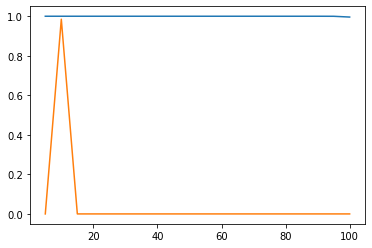

In [69]:
############## Task 7
plt.plot(cards, results['deepsets']['acc'], label='deepsets')
plt.plot(cards, results['lstm']['acc'], label='lstm')

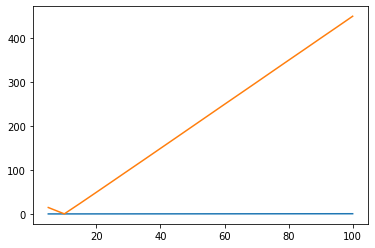

In [70]:
plt.plot(cards, results['deepsets']['mae'], label='deepsets')
plt.plot(cards, results['lstm']['mae'], label='lstm')
##################

## part 2

### pdb_to_graph.py

In [1]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import numpy as np
import matplotlib.pyplot as plt

from functools import partial

from graphein.protein.config import ProteinGraphConfig
from graphein.protein.graphs import construct_graph
from graphein.protein.visualisation import plot_protein_structure_graph
from graphein.protein.analysis import plot_degree_by_residue_type, plot_edge_type_distribution, plot_residue_composition
from graphein.protein.edges.distance import add_peptide_bonds, add_hydrogen_bond_interactions, add_disulfide_interactions, add_ionic_interactions, add_aromatic_interactions, add_aromatic_sulphur_interactions, add_cation_pi_interactions, add_distance_threshold, add_k_nn_edges
from graphein.protein.features.nodes.amino_acid import amino_acid_one_hot, expasy_protein_scale, meiler_embedding
from graphein.protein.utils import download_alphafold_structure

# Configuration object for graph construction
config = ProteinGraphConfig(**{"node_metadata_functions": [amino_acid_one_hot, 
                                                           expasy_protein_scale,
                                                           meiler_embedding],
                               "edge_construction_functions": [add_peptide_bonds,
                                                  add_aromatic_interactions,
                                                  add_hydrogen_bond_interactions,
                                                  add_disulfide_interactions,
                                                  add_ionic_interactions,
                                                  add_aromatic_sulphur_interactions,
                                                  add_cation_pi_interactions,
                                                  partial(add_distance_threshold, long_interaction_threshold=5, threshold=10.),
                                                  partial(add_k_nn_edges, k=3, long_interaction_threshold=2)],
                               })

PDB_CODE = "Q5VSL9"

To use the Graphein submodule graphein.protein.features.sequence.embeddings, you need to install: biovec 
biovec cannot be installed via conda
To use the Graphein submodule graphein.protein.visualisation, you need to install: pytorch3d 
To do so, use the following command: conda install -c pytorch3d pytorch3d


[12/15/22 05:51:30] WARNING  To use the Graphein submodule graphein.protein.meshes, you need to        ]8;id=49879;file:///home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/graphein/protein/meshes.py\meshes.py]8;;\:]8;id=816981;file:///home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/graphein/protein/meshes.py#29\29]8;;\
                             install: pytorch3d                                                                    
                             To do so, use the following command: conda install -c pytorch3d pytorch3d             

Output()

/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/biopandas/pdb/pandas_pdb.py:681: 
SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Number of nodes: 837
Number of edges: 4258
Max degree: 25
Min degree: 2
Mean degree: 10.174432497013143


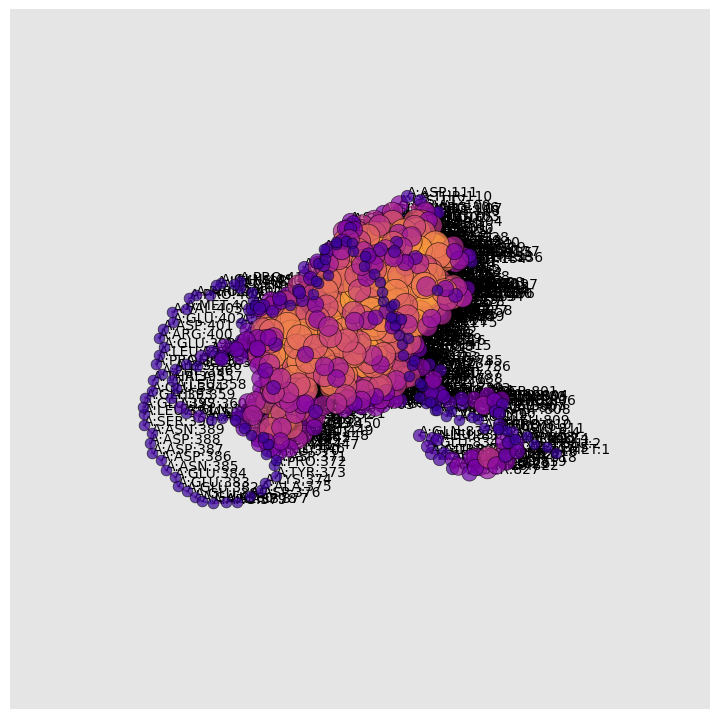

In [4]:
############## Task 8
    
##################
protein_path = download_alphafold_structure(PDB_CODE, aligned_score=False)
G = construct_graph(pdb_path=protein_path, config=config)
##################

# Print number of nodes and number of edges
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())


############## Task 9

##################
seq_degree = [G.degree(node) for node in G.nodes()]
print(f"Max degree: {np.max(seq_degree)}")
print(f"Min degree: {np.min(seq_degree)}")
print(f"Mean degree: {np.mean(seq_degree)}")

p = plot_degree_by_residue_type(G)
p.write_image('degree_by_residue_type.png')

p2 = plot_edge_type_distribution(G)
p2.write_image('edge_type_distribution.png')

p3 = plot_residue_composition(G)
p3.write_image('residue_composition.png')

p4 = plot_protein_structure_graph(G)
##################

In [5]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import torch
import torch.nn as nn
import torch.nn.functional as F

class GNN(nn.Module):
    """
    Simple message passing model that consists of 2 message passing layers
    and the sum aggregation function
    """
    def __init__(self, input_dim, hidden_dim, dropout, n_class):
        super(GNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, n_class)
        self.bn = nn.BatchNorm1d(hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x_in, adj, idx):
        
        ############## Task 10
    
        ##################
        x = self.relu(adj @ self.fc1(x_in))
        x = self.dropout(x)
        x = adj @ self.fc2(x)
        
        ##################
        
        # sum aggregator
        idx = idx.unsqueeze(1).repeat(1, x.size(1))
        out = torch.zeros(torch.max(idx)+1, x.size(1)).to(x_in.device)
        out = out.scatter_add_(0, idx, x)
        
        ##################
        out = self.bn(out)
        out = self.relu(self.fc3(out))
        out = self.dropout(out)
        out = self.fc4(out)
        ##################

        return F.log_softmax(out, dim=1)

### util.py

In [6]:

"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import numpy as np
import scipy.sparse as sp

import torch

def load_data(): 
    """
    Function that loads graphs
    """  
    graph_indicator = np.loadtxt("../data/graph_indicator.txt", dtype=np.int64)
    _,graph_size = np.unique(graph_indicator, return_counts=True)
    
    edges = np.loadtxt("../data/edgelist.txt", dtype=np.int64, delimiter=",")
    A = sp.csr_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])), shape=(graph_indicator.size, graph_indicator.size))
    A += A.T
    
    x = np.loadtxt("../data/node_attributes.txt", delimiter=",")
    edge_attr = np.loadtxt("../data/edge_attributes.txt", delimiter=",")
    graph_labels = np.loadtxt("../data/graph_labels.txt", dtype=np.int64)
    
    adj = []
    features = []
    edge_features = []
    idx_n = 0
    idx_m = 0
    for i in range(graph_size.size):
        adj.append(A[idx_n:idx_n+graph_size[i],idx_n:idx_n+graph_size[i]])
        edge_features.append(edge_attr[idx_m:idx_m+adj[i].nnz,:])
        features.append(x[idx_n:idx_n+graph_size[i],:])
        idx_n += graph_size[i]
        idx_m += adj[i].nnz

    return adj, features, edge_features, graph_labels

def normalize_adjacency(A):
    """
    Function that normalizes an adjacency matrix
    """
    n = A.shape[0]
    A = A + sp.identity(n)
    degs = A.dot(np.ones(n))
    inv_degs = np.power(degs, -1)
    D = sp.diags(inv_degs)
    A_normalized = D.dot(A)

    return A_normalized

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """
    Function that converts a Scipy sparse matrix to a sparse Torch tensor
    """
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

### arg_classification.py

In [14]:
import torch
import torch.nn as nn
from torch import optim
import time
from sklearn.model_selection import train_test_split
from tqdm import tqdm
# from utils import load_data, normalize_adjacency, sparse_mx_to_torch_sparse_tensor
# from model import GNN

# Load graphs
adj, features, edge_features, y = load_data() 

# Normalize adjacency matrices
adj = [normalize_adjacency(A) for A in adj]

# Split data into training and test sets
adj_train, adj_test, features_train, features_test, y_train, y_test = train_test_split(adj, features, y, test_size=0.1)

# Initialize device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 50
batch_size = 64
n_hidden = 64
n_input = 23
dropout = 0.2
learning_rate = 0.001
n_class = 2

# Compute number of training and test samples
N_train = len(adj_train)
N_test = len(adj_test)

# Initializes model and optimizer
model = GNN(n_input, n_hidden, dropout, n_class).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

# Train model
for epoch in range(epochs):
    t = time.time()
    model.train()
    train_loss = 0
    correct = 0
    count = 0
    # Iterate over the batches
    for i in tqdm(range(0, N_train, batch_size)):
        adj_batch = list()
        features_batch = list()
        idx_batch = list()
        y_batch = list()
        
        # Create tensors
        for j in range(i, min(N_train, i+batch_size)):
            n = adj_train[j].shape[0]
            adj_batch.append(adj_train[j]+sp.identity(n))
            features_batch.append(features_train[j])
            idx_batch.extend([j-i]*n)
            y_batch.append(y_train[j])
            
        adj_batch = sp.block_diag(adj_batch)
        features_batch = np.vstack(features_batch)

        adj_batch = sparse_mx_to_torch_sparse_tensor(adj_batch).to(device)
        features_batch = torch.FloatTensor(features_batch).to(device)
        idx_batch = torch.LongTensor(idx_batch).to(device)
        y_batch = torch.LongTensor(y_batch).to(device)
        
        optimizer.zero_grad()
        output = model(features_batch, adj_batch, idx_batch)
        loss = loss_function(output, y_batch)
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
        preds = output.max(1)[1].type_as(y_batch)
        correct += torch.sum(preds.eq(y_batch).double())
        loss.backward()
        optimizer.step()
    
    if epoch % 5 == 0:
        print('Epoch: {:03d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(train_loss / count),
              'acc_train: {:.4f}'.format(correct / count),
              'time: {:.4f}s'.format(time.time() - t))
    time.sleep(0.5)

# Evaluate model
model.eval()
test_loss = 0
correct = 0
count = 0
# Iterate over the batches
for i in tqdm(range(0, N_test, batch_size)):
    adj_batch = list()
    features_batch = list()
    idx_batch = list()
    y_batch = list()
    
    # Create tensors
    for j in range(i, min(N_test, i+batch_size)):
        n = adj_test[j].shape[0]
        adj_batch.append(adj_test[j]+sp.identity(n))
        features_batch.append(features_test[j])
        idx_batch.extend([j-i]*n)
        y_batch.append(y_test[j])
        
    adj_batch = sp.block_diag(adj_batch)
    features_batch = np.vstack(features_batch)

    adj_batch = sparse_mx_to_torch_sparse_tensor(adj_batch).to(device)
    features_batch = torch.FloatTensor(features_batch).to(device)
    idx_batch = torch.LongTensor(idx_batch).to(device)
    y_batch = torch.LongTensor(y_batch).to(device)

    output = model(features_batch, adj_batch, idx_batch)
    loss = loss_function(output, y_batch)
    test_loss += loss.item() * output.size(0)
    count += output.size(0)
    preds = output.max(1)[1].type_as(y_batch)
    correct += torch.sum(preds.eq(y_batch).double())

print('loss_test: {:.4f}'.format(test_loss / count),
      'acc_test: {:.4f}'.format(correct / count),
      'time: {:.4f}s'.format(time.time() - t))
time.sleep(0.5)

100%|██████████| 43/43 [00:06<00:00,  6.46it/s]


Epoch: 001 loss_train: 0.6433 acc_train: 0.6253 time: 6.6616s


100%|██████████| 43/43 [00:06<00:00,  6.82it/s]


Epoch: 006 loss_train: 0.5631 acc_train: 0.7301 time: 6.3088s


100%|██████████| 43/43 [00:06<00:00,  6.42it/s]


Epoch: 011 loss_train: 0.5452 acc_train: 0.7286 time: 6.7015s


100%|██████████| 43/43 [00:06<00:00,  6.65it/s]


Epoch: 016 loss_train: 0.5287 acc_train: 0.7408 time: 6.4652s


100%|██████████| 43/43 [00:06<00:00,  6.41it/s]


Epoch: 021 loss_train: 0.5143 acc_train: 0.7560 time: 6.7067s


100%|██████████| 43/43 [00:06<00:00,  6.35it/s]


Epoch: 026 loss_train: 0.5050 acc_train: 0.7519 time: 6.7776s


100%|██████████| 43/43 [00:06<00:00,  6.51it/s]


Epoch: 031 loss_train: 0.4798 acc_train: 0.7668 time: 6.6048s


100%|██████████| 43/43 [00:06<00:00,  6.40it/s]


Epoch: 036 loss_train: 0.4738 acc_train: 0.7668 time: 6.7251s


100%|██████████| 43/43 [00:06<00:00,  6.48it/s]


Epoch: 041 loss_train: 0.4669 acc_train: 0.7790 time: 6.6347s


100%|██████████| 43/43 [00:06<00:00,  6.58it/s]


Epoch: 046 loss_train: 0.4483 acc_train: 0.7864 time: 6.5383s


100%|██████████| 5/5 [00:00<00:00,  7.47it/s]


loss_test: 0.4697 acc_test: 0.7475 time: 8.2513s
